In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fuel_econ.csv to fuel_econ.csv


In [ ]:
fuel_econ = pd.read_csv('/content/fuel_econ.csv')
fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


In [ ]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## Combined MPG Histogram

This bar chart shows how the combined miles per gallon (MPG) ratings of cars in the database are spread over different cars. The combined MPG of most cars is bunched between 20 and 30, but fewer cars achieve higher efficiency.

### Insight:
- Cars with a high combined MPG consume less fuel.
- The most frequent cars fall into the average efficiency group.
- This information can guide consumers looking for fuel-efficient vehicles or companies that are optimizing fuel efficiency.

<Axes: xlabel='comb', ylabel='Count'>

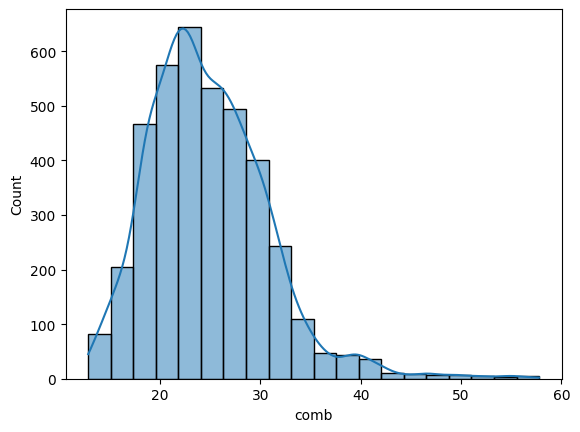

In [ ]:
sns.histplot(data=fuel_econ, x='comb', bins=20, kde=True)

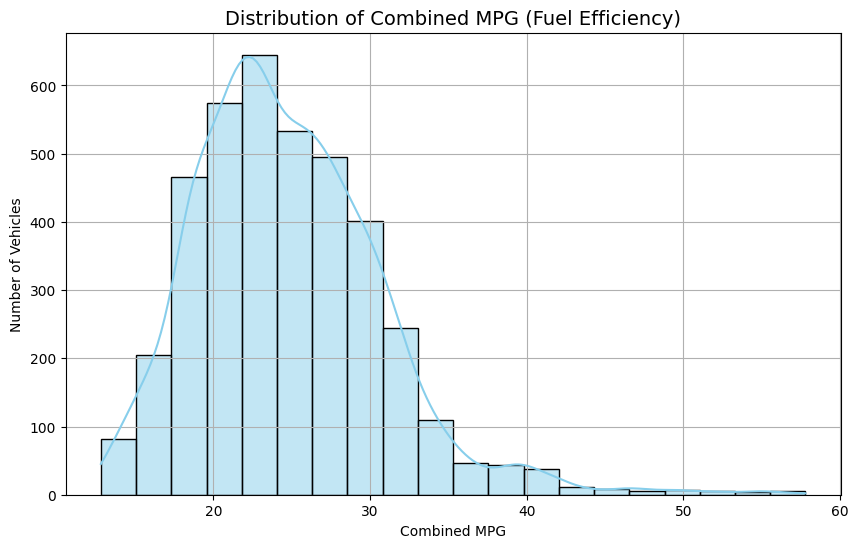

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fuel_econ, x='comb', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Combined MPG (Fuel Efficiency)', fontsize=14)
plt.xlabel('Combined MPG')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

The histogram shows a left-skewed distribution of combined miles per gallon (MPG) across vehicles, with the number of vehicles above 500 falling in the 20–35 MPG range.

The peak is around 25 - 30 MPG, with over 600 cars in that range. While the overall MPG spans from 5 to 60, there are no significant outliers. This suggests that most cars have moderate fuel efficiency, with a few high-efficiency vehicles like hybrids and economy cars pulling the average higher.

I chose to focus on combined MPG rather than individual city or highway MPG because it provides a more comprehensive measure of overall fuel efficiency and is typically the metric used by both consumers and policymakers when considering vehicle fuel economy.

For consumers and policymakers, this indicates the importance of promoting higher-efficiency models to reduce fuel consumption and emissions.

In [ ]:
numerical_columns = fuel_econ.select_dtypes(include=['float64', 'int64'])

In [ ]:
corr_matrix = numerical_columns.corr()

The heatmap shows strong correlations between comb MPG and other mileage metrics like city, UCity, highway, and UHighway—all above 0.90. Since comb MPG already summarizes city and highway efficiency, I’d keep it and drop the others to avoid repetition.

 I also noticed that feScore and ghgScore have a near-perfect correlation (0.99), meaning they offer almost identical insight; keeping just one would simplify the dataset.

There’s a strong negative correlation between comb MPG and co2 emissions (-0.93), which reinforces that better fuel economy leads to lower emissions. Similarly, engine size (displ) and cylinder count are highly correlated (0.93) and both negatively impact MPG. Some columns like pv2, pv4, and year showed weak relationships and could likely be removed. Overall, the heatmap helped pinpoint which features are most valuable for understanding fuel efficiency and environmental impact.

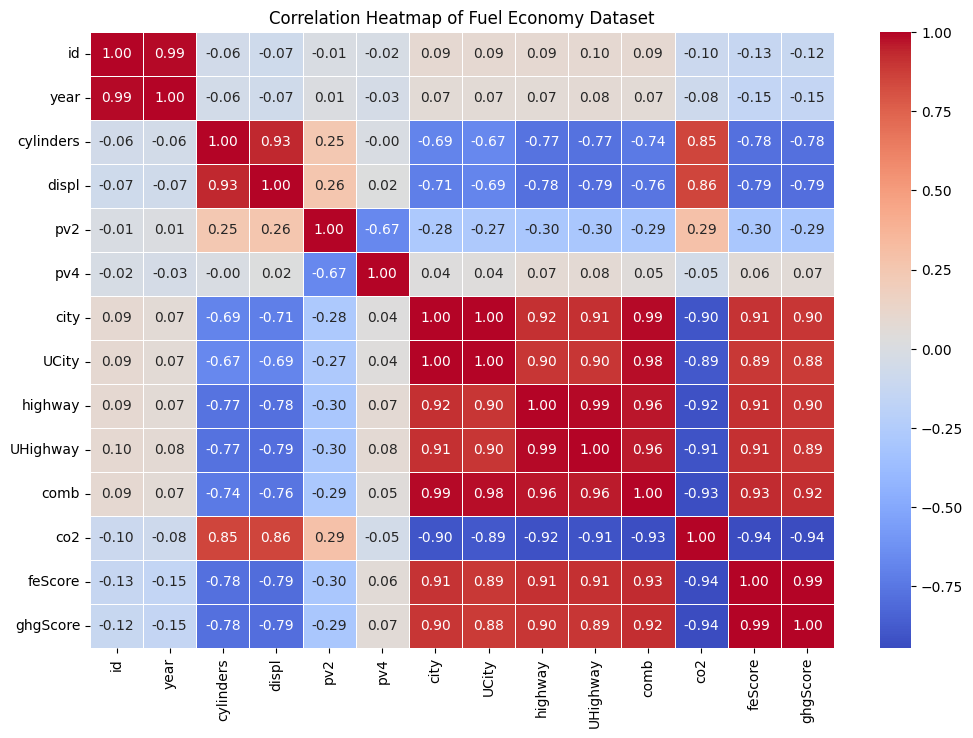

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Fuel Economy Dataset")
plt.show()